In [1]:
# importing all required modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
# Load data set:
df = pd.read_csv('uci breast cancer datatset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Feture transformation to standardised scale
from sklearn.preprocessing import StandardScaler 
standardized = StandardScaler() 
standardized_X = standardized.fit_transform(df.drop(['id', 'diagnosis'], axis=1))
X = pd.DataFrame(standardized_X, columns=df.columns[2:32])
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  sym

In [5]:
# Encoding label feature:
from sklearn.preprocessing import LabelEncoder # importing Label Encoder modules
lben = LabelEncoder() # create object for Label Encoder 
y = lben.fit_transform(df['diagnosis'])
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [6]:
# Split data for train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# Apply decision tree classification
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

MSE for Decision Tree:  0.04093567251461988
Traning Accuracy for Decision Tree:  1.0
Testing Accuracy Decision Tree:  0.9590643274853801


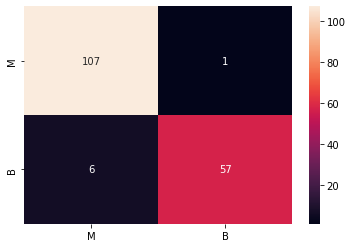

In [8]:
# Evaluate the performance of decision tree classification
from sklearn.metrics import classification_report, f1_score, confusion_matrix, mean_squared_error
class_name = ['M', 'B']
cm_dtc = pd.DataFrame(confusion_matrix(y_test, y_pred_dtc), columns=class_name, index=class_name)
sbn.heatmap(cm_dtc, annot=True, fmt='d')
print(classification_report(y_test, y_pred_dtc))

print("MSE for Decision Tree: ", mean_squared_error(y_test, y_pred_dtc)) # The mean squared error
print ("Traning Accuracy for Decision Tree: ", dtc.score(X_train, y_train)) # Check training accuracy
print ("Testing Accuracy Decision Tree: ", dtc.score(X_test, y_test)) # Check testing accuracy


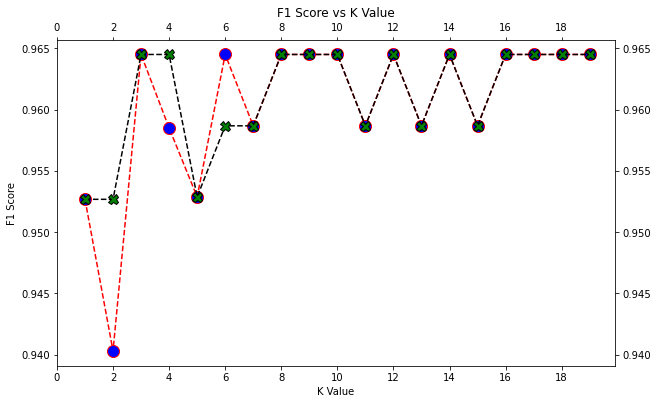

In [9]:
# Finding an appropiate n_neighbors value for kNN classifier by uniform and distance weight function:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
f1s = []
f2s = []
for i in range(1, 20):
    knct = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knct.fit(X_train, y_train)
    pred_i = knct.predict(X_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
    
    knct2 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knct2.fit(X_train, y_train)
    pred_i2 = knct2.predict(X_test)
    f2s.append(f1_score(y_test, pred_i2, average='weighted'))
           
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)
plt.plot(range(1, 20), f2s, color='black', linestyle='dashed', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('F1 Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.xticks(range(0, 20, 2))
plt.tick_params(labeltop=True, labelright=True, top=True, right=True)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       108
           1       1.00      0.90      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

MSE for kNN uniform:  0.03508771929824561
Traning Accuracy for kNN uniform:  0.9824120603015075
Testing Accuracy kNN uniform:  0.9649122807017544


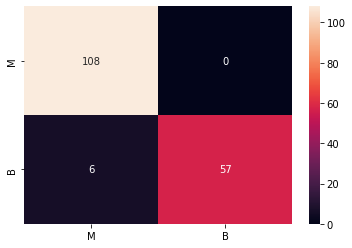

In [10]:
# Apply optimised n_neighbors value for kNN classification with default weight function:
knc3 = KNeighborsClassifier(n_neighbors=3)
knc3.fit(X_train, y_train)
y_pred_knc3 = knc3.predict(X_test)

# Evaluate the performance of kNN classification:
cm3 = pd.DataFrame(confusion_matrix(y_test, y_pred_knc3), columns=class_name, index=class_name)
sbn.heatmap(cm3, annot=True, fmt='d')
print(classification_report(y_test, y_pred_knc3))

print("MSE for kNN uniform: ", mean_squared_error(y_test, y_pred_knc3)) # The mean squared error
print ("Traning Accuracy for kNN uniform: ", knc3.score(X_train, y_train)) # Check training accuracy
print ("Testing Accuracy kNN uniform: ", knc3.score(X_test, y_test)) # Check testing accuracy

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

MSE for Logistic Regression:  0.029239766081871343
Traning Accuracy for Logistic Regression:  0.9899497487437185
Testing Accuracy Logistic Regression:  0.9707602339181286


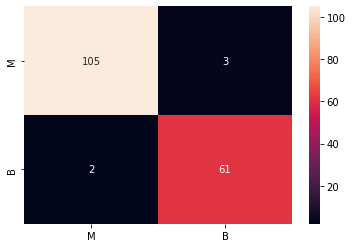

In [11]:
# Apply Logistic Regression 
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_lgt = logit.predict(X_test)

# Evaluate the performance of Logistic Regression:
lgt = pd.DataFrame(confusion_matrix(y_test, y_pred_lgt), columns=class_name, index=class_name)
sbn.heatmap(lgt, annot=True, fmt='d')
print(classification_report(y_test, y_pred_lgt))

print("MSE for Logistic Regression: ", mean_squared_error(y_test, y_pred_lgt)) # The mean squared error
print ("Traning Accuracy for Logistic Regression: ", logit.score(X_train, y_train)) # Check training accuracy
print ("Testing Accuracy Logistic Regression: ", logit.score(X_test, y_test)) # Check testing accuracy

0.9477513227513227 0.9523809523809523 0.9702380952380952


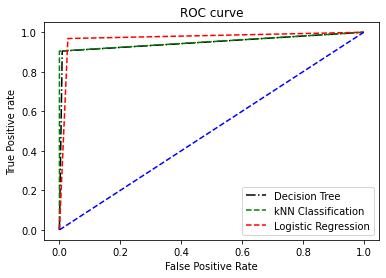

In [12]:
# ROC and AUC evaluation
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_dtc, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_knc3, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_lgt, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, y_pred_dtc)
auc_score2 = roc_auc_score(y_test, y_pred_knc3)
auc_score3 = roc_auc_score(y_test, y_pred_lgt)

print(auc_score1, auc_score2, auc_score3)

plt.plot(fpr1, tpr1, linestyle='dashdot',color='black', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='kNN Classification')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();